# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [5]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

2025-08-14 01:35:16.969111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Task: Normalize the data to have pixel values between 0 and 1
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

Visualize 5 random images from the training set with their labels.

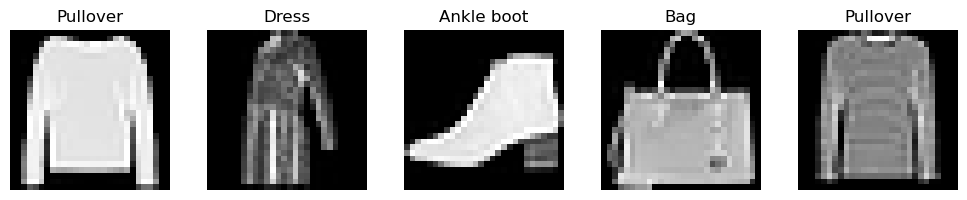

In [8]:
# Select 5 random indices
import numpy as np
random_indices = np.random.choice(len(x_train), size=5, replace=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plot
plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()

Reshape the data to include a channel dimension and confirm the new shape.

In [10]:
# Task: Reshape x_train and x_test to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Task: Build your model here
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile your model with an appropriate optimizer, loss function, and metric.

In [15]:
# Task: Compile your model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [17]:
# Task: Train the model and store the training history in a variable
model.fit(
    x_train, y_train,                
    epochs=10,                      
    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8526 - loss: 0.4129 - val_accuracy: 0.8905 - val_loss: 0.3107
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9028 - loss: 0.2762 - val_accuracy: 0.9025 - val_loss: 0.2659
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9172 - loss: 0.2302 - val_accuracy: 0.9050 - val_loss: 0.2639
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9299 - loss: 0.1936 - val_accuracy: 0.9148 - val_loss: 0.2385
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9406 - loss: 0.1655 - val_accuracy: 0.9120 - val_loss: 0.2478
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9497 - loss: 0.1401 - val_accuracy: 0.9107 - val_loss: 0.2598
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9569 - loss: 0.1202 - val_accuracy: 0.9142 - val_loss: 0.2751
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9623 -

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [27]:
# Task: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9115 - loss: 0.3249
Test Accuracy: 0.9115


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


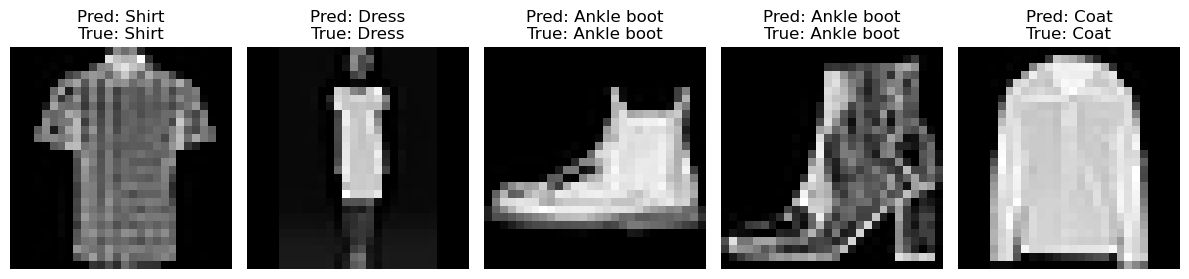

In [36]:
# Task: Use model.predict() and display predictions
# Your code here to display images with predicted and actual labels

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Select 5 random test images
num_images = 5
random_indices = np.random.choice(len(x_test), size=num_images, replace=False)

# Plot
plt.figure(figsize=(12, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Construct a confusion matrix to visualize how well your model performed across different classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Figure size 1000x800 with 0 Axes>

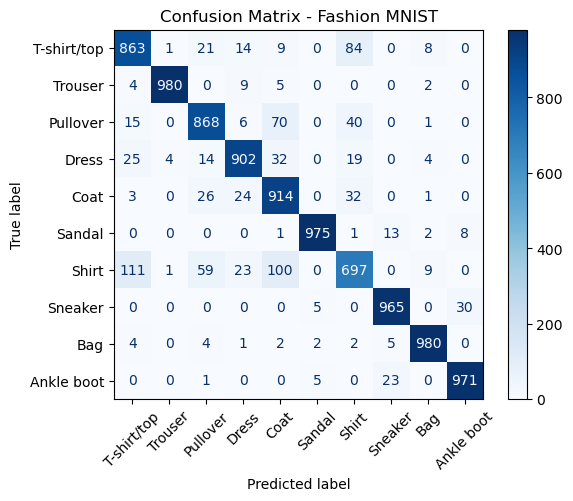

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
# Get predicted labels

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()